In [1]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
pokemons_filename = 'pokemon.csv'
pokemons = read_csv(pokemons_filename)

len(pokemons)

801

In [2]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)
    
def parse_int_dataframe(attributes):
    for a in attributes:
        for pokemon in pokemons:
            pokemon[a] = parse_maybe_int(pokemon[a])
    
to_be_parse = ['generation', 'percentage_male', 'attack', 'defense', 'hp', 'speed', 'weight_kg' , 'is_legendary', 'capture_rate']

#Change '30 (Meteorite)255 (Core)' to 30
parse_int_dataframe(to_be_parse)
pokemons[0]

{'abilities': "['Overgrow', 'Chlorophyll']",
 'against_bug': '1',
 'against_dark': '1',
 'against_dragon': '1',
 'against_electric': '1',
 'against_fairy': '1',
 'against_fight': '1',
 'against_fire': '2',
 'against_flying': '2',
 'against_ghost': '1',
 'against_grass': '0',
 'against_ground': '1',
 'against_ice': '2',
 'against_normal': '1',
 'against_poison': '1',
 'against_psychic': '2',
 'against_rock': '1',
 'against_steel': '1',
 'against_water': '1',
 'attack': 49,
 'base_egg_steps': '5120',
 'base_happiness': '70',
 'base_total': '318',
 'capture_rate': 45,
 'classfication': 'Seed Pokémon',
 'defense': 49,
 'experience_growth': '1059860',
 'generation': 1,
 'height_m': '1',
 'hp': 45,
 'is_legendary': 0,
 'japanese_name': 'Fushigidaneフシギダネ',
 'name': 'Bulbasaur',
 'percentage_male': 88,
 'pokedex_number': '1',
 'sp_attack': '65',
 'sp_defense': '65',
 'speed': 45,
 'type1': 'grass',
 'type2': 'poison',
 'weight_kg': 7}

In [3]:
df_pokemons = pd.DataFrame(pokemons)

In [4]:
#df_pokemons.pivot_table(index=['type1','type2'], aggfunc='count')

pd.crosstab(index=df_pokemons['generation'], columns=df_pokemons['is_legendary'], margins=True)

is_legendary,0,1,All
generation,,,
1,146,5,151
2,94,6,100
3,125,10,135
4,94,13,107
5,143,13,156
6,66,6,72
7,63,17,80
All,731,70,801


In [5]:
legendary_perc = pd.crosstab(index=df_pokemons['generation'], columns=df_pokemons['is_legendary'], normalize='index', margins=True)
display(legendary_perc.style\
        .bar(subset=[1], color='lightgrey')\
        .format("{:.1%}"))

In [6]:
#df_pokemons[['type1','type2']]

In [7]:
df_type = pd.crosstab(index=df_pokemons['type1'], columns=df_pokemons['type2'])
print(df_pokemons['type1'].unique())
print(len(df_type.index))
print(df_type.index)
print(len(df_type.columns))
print(df_type.columns)

['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground' 'fairy'
 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel' 'flying']
18
Index(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'],
      dtype='object', name='type1')
19
Index(['', 'bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'],
      dtype='object', name='type2')


In [15]:
def generateHeatmapTypes(df,types):

    #types = df['type1'].unique()
    df_types = pd.DataFrame(index=types, columns=types)
    #df_types.at['grass','grass'] = 1

    #initialize at 0 for all
    for row in types:
        for index in types:
            df_types.at[index,row] = 0

    #computing matrix of types
    for index, row in df.iterrows():
        type1 = row['type1']
        type2 = row['type2']

        if row['type2'] == '':
            df_types.at[type1,type1] = df_types.loc[type1][type1] + 1
        else:
            df_types.at[type1,type2] = df_types.loc[type1][type2] + 1

    #mirroring the matrix to keep type-type whatever which is 1 or 2
    #display(df_types)

    df_types2 = df_types.copy()

    for col in range(len(df_types)):
        for line in range(len(df_types)):
            if col > line:
                #print("col : " + str(col) + "  / line : " + str(line))
                col_type = types[col]
                line_type = types[line]
                df_types2.at[col_type,line_type] = df_types.loc[col_type][line_type] + df_types.loc[line_type][col_type]
                df_types2.at[line_type,col_type] = 0

    display(df_types2)
    
    return df_types2
    

def getLegendary(df):
    return df[df['is_legendary'] == 1]

def getRegular(df):
    return df[df['is_legendary'] == 0]

def getGeneration(df,generation):
    return df[df['generation'] == generation]


In [16]:
types = df_pokemons['type1'].unique()

print("Legendary -----------------------")
df_leg = getLegendary(df_pokemons)
generateHeatmapTypes(df_leg,types)


print("\n Regular -----------------------")
df_reg = getRegular(df_pokemons)
generateHeatmapTypes(df_reg,types)





Legendary -----------------------


,grass,fire,water,bug,normal,poison,electric,ground,fairy,fighting,psychic,rock,ghost,ice,dragon,dark,steel,flying
grass,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fire,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
water,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bug,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
normal,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
poison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
electric,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
ground,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
fairy,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
fighting,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0



 Regular -----------------------


,grass,fire,water,bug,normal,poison,electric,ground,fairy,fighting,psychic,rock,ghost,ice,dragon,dark,steel,flying
grass,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fire,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
water,3,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bug,6,2,5,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
normal,2,2,1,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0
poison,14,2,6,12,0,15,0,0,0,0,0,0,0,0,0,0,0,0
electric,0,0,2,4,2,0,25,0,0,0,0,0,0,0,0,0,0,0
ground,1,3,9,1,1,2,1,11,0,0,0,0,0,0,0,0,0,0
fairy,4,0,3,2,4,0,1,0,15,0,0,0,0,0,0,0,0,0
fighting,2,6,1,1,2,2,0,0,0,22,0,0,0,0,0,0,0,0


,grass,fire,water,bug,normal,poison,electric,ground,fairy,fighting,psychic,rock,ghost,ice,dragon,dark,steel,flying
grass,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fire,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
water,3,0,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bug,6,2,5,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
normal,2,2,1,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0
poison,14,2,6,12,0,15,0,0,0,0,0,0,0,0,0,0,0,0
electric,0,0,2,4,2,0,25,0,0,0,0,0,0,0,0,0,0,0
ground,1,3,9,1,1,2,1,11,0,0,0,0,0,0,0,0,0,0
fairy,4,0,3,2,4,0,1,0,15,0,0,0,0,0,0,0,0,0
fighting,2,6,1,1,2,2,0,0,0,22,0,0,0,0,0,0,0,0


In [10]:
df_legendary = df_pokemons[df_pokemons['is_legendary'] == 1]
print(len(df_legendary))

df_regular = df_pokemons[df_pokemons['is_legendary'] == 0]
print(len(df_regular))

70
731


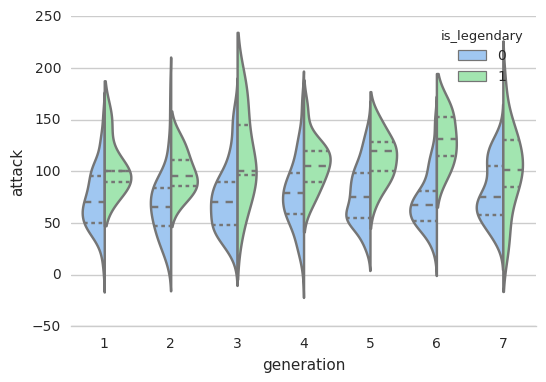

In [77]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="generation", y="attack", hue="is_legendary",
               split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               data=df_pokemons)
sns.despine(left=True)

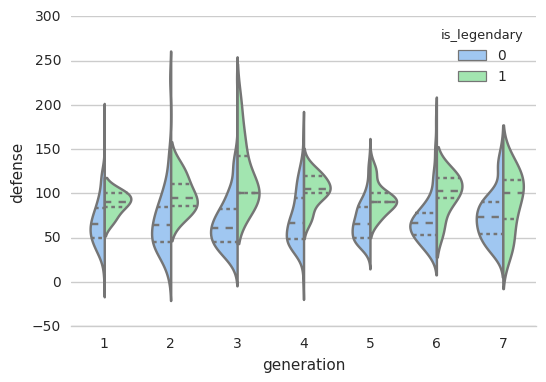

In [78]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="generation", y="defense", hue="is_legendary",
               split=True, inner="quart",
               #palette={"Yes": "y", "No": "b"},
               data=df_pokemons)
sns.despine(left=True)

In [79]:
def drawRadar(df,ax):
    # ------- PART 1: Create background
    # number of variable
    categories=list(df)
    #display(categories)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    #ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([50,100,150], ["50","100","150"], color="grey", size=7)
    plt.ylim(0,150)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    colors = sns.color_palette("Set2")

    radar_groups = [
        {
            'loc': 'Legendary',
            'color': colors[1],
            'label': 'Legendary'
        },
        {
            'loc': 'Regular',
            'color': colors[0],
            'label': 'Regular'
        }
    ]

    for i in range(len(radar_groups)):
        values=df.loc[radar_groups[i]['loc']].values.flatten().tolist()
        #display(values)
        values += values[:1]
        ax.plot(angles, values, color=radar_groups[i]['color'], linewidth=1, linestyle='solid', label=radar_groups[i]['label'])
        ax.fill(angles, values, color=radar_groups[i]['color'], alpha=0.4)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [80]:
def simplerDataframe(df):
    return df[['name','hp','speed','defense','attack','is_legendary']]

def getMeans(dfLeg,dfReg):
    col_list = ['hp','speed','defense','attack']
    leg = 'Legendary'
    reg = 'Regular'
    
    dfLeg.loc[leg] = dfLeg.mean()
    #display(dfLeg.loc[leg])
    
    dfReg.loc[reg] = dfReg.mean()
    #display(dfReg.loc[reg])
    
    dfmerge = pd.concat([dfLeg,dfReg])
    dfmean = dfmerge[col_list].loc[[reg,leg]]
    display(dfmean)
    
    return dfmean

def displayGenerationStats():
    fig = plt.figure(figsize = (50, 30))
    
    for gen in range(1,8):
        print(" ----- GENERATION " + str(gen))
        df = getGeneration(df_pokemons,gen)
        dfsimple = simplerDataframe(df)
        dfsLegendary = getLegendary(dfsimple)
        dfsRegular = getRegular(dfsimple)

        dfMeans = getMeans(dfsLegendary,dfsRegular)
        
        ax = fig.add_subplot(7, 1, gen, polar=True)
        drawRadar(dfMeans,ax)

 ----- GENERATION 1


/home/grossedondon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/grossedondon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,hp,speed,defense,attack
Regular,63.287671,69.027397,69.431507,73.486301
Legendary,95.200000,103.000000,89.000000,105.000000


 ----- GENERATION 2


,hp,speed,defense,attack
Regular,68.946809,59.159574,70.042553,68.095745
Legendary,102.833333,100.000000,99.166667,99.166667


 ----- GENERATION 3


,hp,speed,defense,attack
Regular,64.08,61.104,68.768,74.08
Legendary,85.50,94.500,121.000,116.00


 ----- GENERATION 4


,hp,speed,defense,attack
Regular,69.585106,65.893617,72.382979,79.234043
Legendary,98.538462,100.307692,103.538462,107.538462


 ----- GENERATION 5


,hp,speed,defense,attack
Regular,68.265734,63.146853,70.000000,77.608392
Legendary,92.846154,103.615385,93.538462,113.000000


 ----- GENERATION 6


,hp,speed,defense,attack
Regular,67.30303,64.484848,71.136364,71.484848
Legendary,113.00000,90.500000,100.166667,132.000000


 ----- GENERATION 7


,hp,speed,defense,attack
Regular,64.761905,58.682540,74.539683,80.238095
Legendary,92.117647,83.882353,90.882353,100.941176


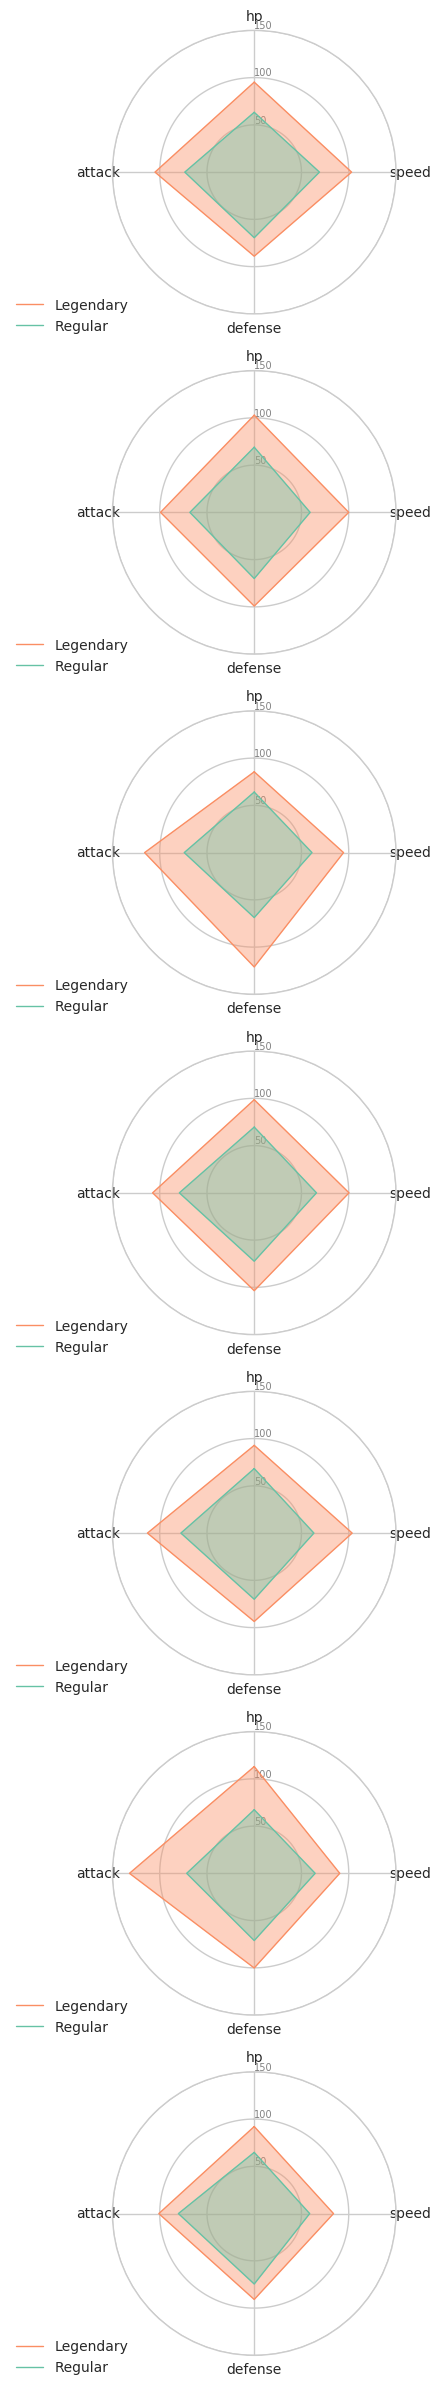

In [81]:
displayGenerationStats()